### Import packages and functions

In [2]:
from oak_hackaton.utils import load_json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
json_path = "/Users/alex/Desktop/Code/Oak_hackathon/oak_hackathon/oak_data/year8_units.json"

In [4]:
year8_units_data = load_json(json_path)
unit_list = list(year8_units_data.keys())
lessons_per_unit = {unit: len(year8_units_data[unit]) for unit in year8_units_data.keys()}

In [5]:
df = pd.DataFrame(list(lessons_per_unit.items()), columns=['Unit', 'Lessons'])
df["Default_lesson_weights"] = df["Lessons"]/df["Lessons"].sum()

In [6]:
df

,Unit,Lessons,Default_lesson_weights
0,Estimation and rounding,16,0.108108
1,Sequences,12,0.081081
2,Graphical representations of linear equations,15,0.101351
3,Solving linear equations,17,0.114865
4,Understanding multiplicative relationships: pe...,16,0.108108
5,Graphical representations of data,11,0.074324
6,Numerical summaries of data,19,0.128378
7,"Perimeter, area and volume",16,0.108108
8,Geometrical properties: polygons,16,0.108108
9,Constructions,10,0.067568


### Visualisation

In [11]:
df.to_csv("/Users/alex/Desktop/Code/Oak_hackathon/oak_hackathon/oak_data/unit_weights.csv", index=False)

In [12]:
df

,Unit,Lessons,Default_lesson_weights,weeks
0,Estimation and rounding,16,0.108108,4
1,Sequences,12,0.081081,3
2,Graphical representations of linear equations,15,0.101351,4
3,Solving linear equations,17,0.114865,4
4,Understanding multiplicative relationships: pe...,16,0.108108,4
5,Graphical representations of data,11,0.074324,3
6,Numerical summaries of data,19,0.128378,4
7,"Perimeter, area and volume",16,0.108108,4
8,Geometrical properties: polygons,16,0.108108,4
9,Constructions,10,0.067568,2


/var/folders/8p/pzkbq491057_v_v_b1vfwrh40000gn/T/ipykernel_2530/660294405.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab20')(np.linspace(0, 1, len(df)))


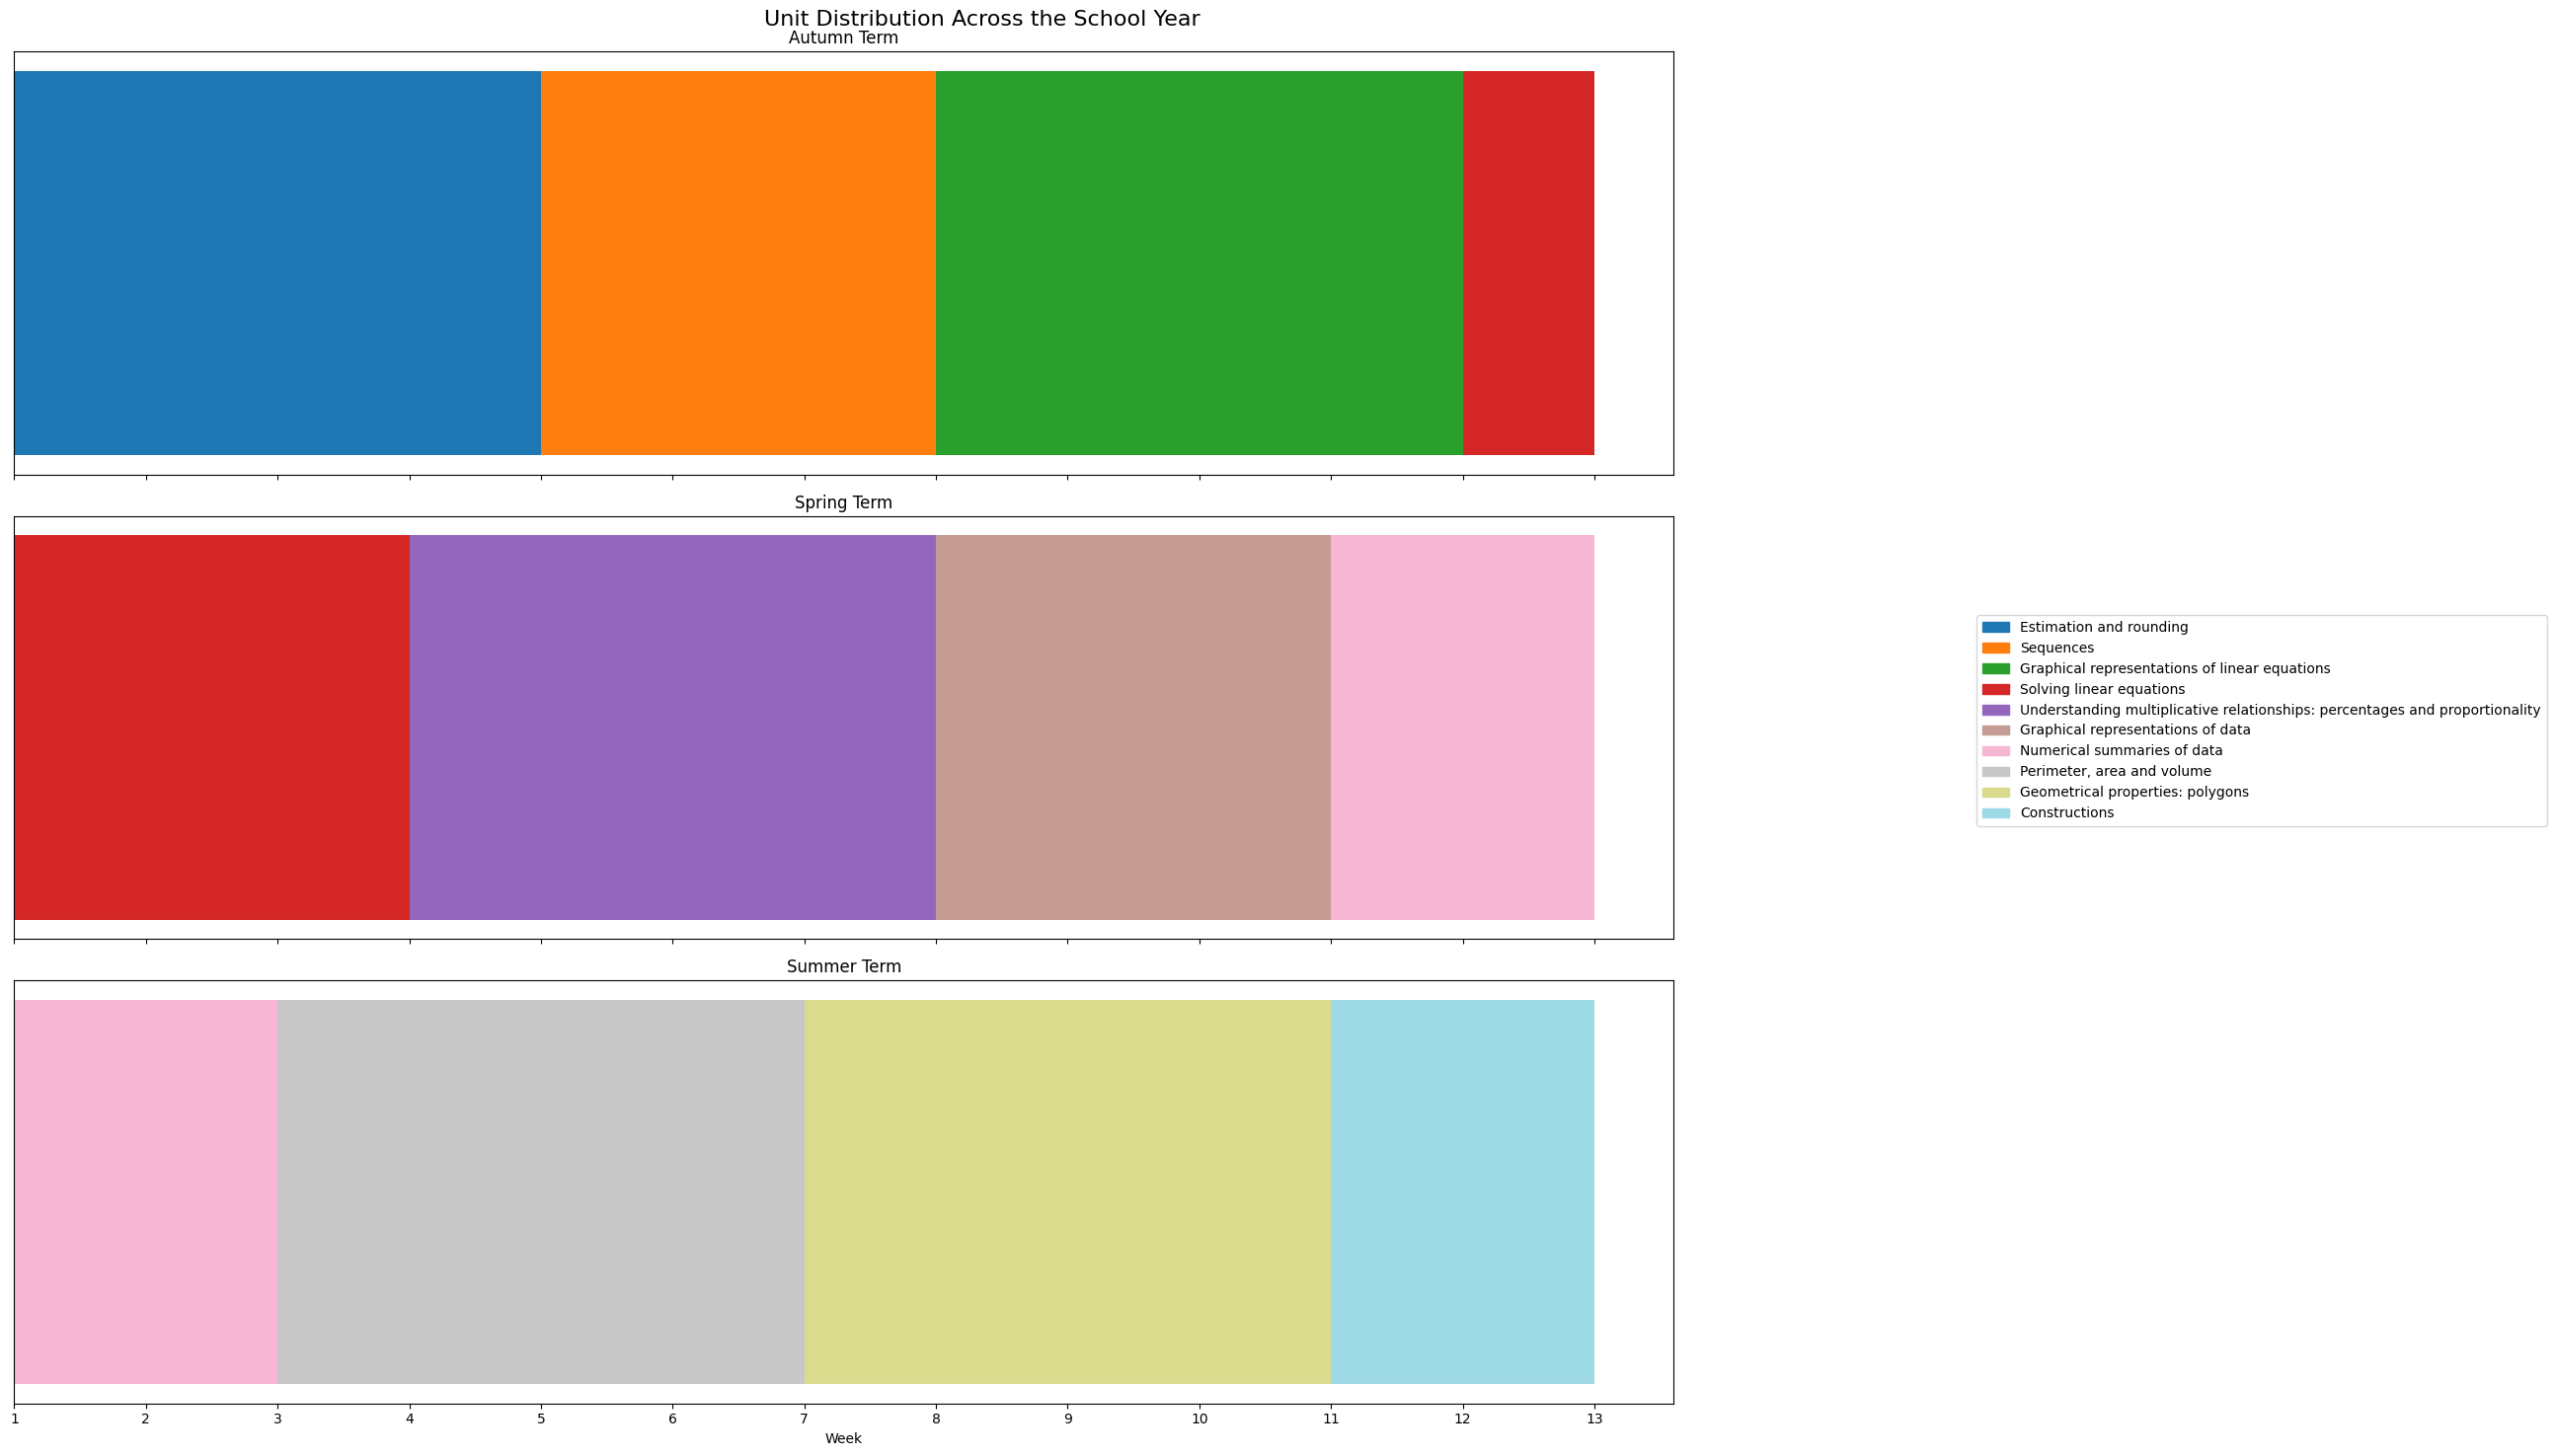

In [8]:
# Calculate weeks for each unit
total_weeks = 36
df['weeks'] = np.round(df['Default_lesson_weights'] * total_weeks).astype(int)

# Adjust weeks to ensure total is exactly 36
diff = total_weeks - df['weeks'].sum()
df.loc[df['weeks'].idxmax(), 'weeks'] += diff

# Create sequence of units
unit_sequence = []
for _, row in df.iterrows():
    unit_sequence.extend([row['Unit']] * row['weeks'])

# Divide into terms
terms = ['Autumn', 'Spring', 'Summer']
weeks_per_term = 12

# Create plot
fig, axs = plt.subplots(3, 1, figsize=(20, 15), sharex=True)
fig.suptitle('Unit Distribution Across the School Year', fontsize=16)

colors = plt.cm.get_cmap('tab20')(np.linspace(0, 1, len(df)))
color_map = dict(zip(df['Unit'], colors))

for term_idx, term in enumerate(terms):
    ax = axs[term_idx]
    start_week = term_idx * weeks_per_term
    end_week = start_week + weeks_per_term
    term_units = unit_sequence[start_week:end_week]
    
    for week, unit in enumerate(term_units):
        ax.barh(0, 1, left=week, color=color_map[unit], height=0.5)
    
    ax.set_title(f'{term} Term')
    ax.set_yticks([])
    ax.set_xticks(range(weeks_per_term + 1))
    ax.set_xticklabels(range(1, weeks_per_term + 2))

# Set common x-axis label
axs[-1].set_xlabel('Week')

# Adjust layout
plt.tight_layout()

# Create legend
handles = [plt.Rectangle((0,0),1,1, color=color_map[unit]) for unit in df['Unit']]
fig.legend(handles, df['Unit'], loc='center left', ncol=1, bbox_to_anchor=(1, 0.5))

# Adjust subplot positions to make room for legend
plt.subplots_adjust(right=0.85)

plt.show()
